In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
from datetime import datetime, timedelta


# Define the ticker symbol for the stock
ticker_symbol = 'AAPL'

# Set the start and end date for the historical data
start_date = '2019-3-27'
end_date = '2024-11-27'

# Fetch the data
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the data
print(data)


[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Date                                                                        
2019-03-27 00:00:00+00:00   45.196423   47.117500   47.439999   46.637501   
2019-03-28 00:00:00+00:00   45.256371   47.180000   47.389999   46.882500   
2019-03-29 00:00:00+00:00   45.551338   47.487499   47.520000   47.134998   
2019-04-01 00:00:00+00:00   45.860680   47.810001   47.919998   47.095001   
2019-04-02 00:00:00+00:00   46.527355   48.505001   48.615002   47.762501   
...                               ...         ...         ...         ...   
2024-11-20 00:00:00+00:00  229.000000  229.000000  229.929993  225.889999   
2024-11-21 00:00:00+00:00  228.520004  228.520004  230.160004  225.710007   
2024-11-22 00:00:00+00:00  229.869995  229.869995  230.720001  228.059998   
2024-11-25 00:00:00+00:00  232.869995  232.869995  233.250000  229.740005   

In [ ]:
data.to_csv('apple_historical_data.csv')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/apple_historical_data.csv',parse_dates=True)
df.head(10)

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-03-27 00:00:00+00:00,45.1964225769043,47.11750030517578,47.439998626708984,46.63750076293945,47.1875,119393600
3,2019-03-28 00:00:00+00:00,45.256370544433594,47.18000030517578,47.38999938964844,46.88249969482422,47.23749923706055,83121600
4,2019-03-29 00:00:00+00:00,45.55133819580078,47.48749923706055,47.52000045776367,47.1349983215332,47.45750045776367,94256000
5,2019-04-01 00:00:00+00:00,45.860679626464844,47.810001373291016,47.91999816894531,47.095001220703125,47.90999984741211,111448000
6,2019-04-02 00:00:00+00:00,46.5273551940918,48.505001068115234,48.6150016784668,47.76250076293945,47.772499084472656,91062800
7,2019-04-03 00:00:00+00:00,46.8463020324707,48.837501525878906,49.125,48.287498474121094,48.3125,93087200
8,2019-04-04 00:00:00+00:00,46.927833557128906,48.92250061035156,49.092498779296875,48.28499984741211,48.6974983215332,76457200
9,2019-04-05 00:00:00+00:00,47.241973876953125,49.25,49.275001525878906,48.98249816894531,49.11249923706055,74106400


In [ ]:
df.tail(5)

,Price,Adj Close,Close,High,Low,Open,Volume
1426,2024-11-20 00:00:00+00:00,229.0,229.0,229.92999267578125,225.88999938964844,228.05999755859375,35169600
1427,2024-11-21 00:00:00+00:00,228.52000427246094,228.52000427246094,230.16000366210938,225.7100067138672,228.8800048828125,42108300
1428,2024-11-22 00:00:00+00:00,229.8699951171875,229.8699951171875,230.72000122070312,228.05999755859375,228.05999755859375,38168300
1429,2024-11-25 00:00:00+00:00,232.8699951171875,232.8699951171875,233.25,229.74000549316406,231.4600067138672,90152800
1430,2024-11-26 00:00:00+00:00,235.05999755859375,235.05999755859375,235.57000732421875,233.3300018310547,233.3300018310547,45986200


In [ ]:
df.shape

(1431, 7)

In [ ]:
# Create a new DataFrame with only 'Date' and 'Close' columns

df_axis = df[['Price', 'Close']].copy()

In [ ]:
df_axis = df_axis.iloc[2:]

df_axis.rename(columns={'Price': 'Date'}, inplace=True)

df_axis.head()

<ipython-input-103-9168b4553a5f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_axis.rename(columns={'Price': 'Date'}, inplace=True)


,Date,Close
2,2019-03-27 00:00:00+00:00,47.11750030517578
3,2019-03-28 00:00:00+00:00,47.18000030517578
4,2019-03-29 00:00:00+00:00,47.48749923706055
5,2019-04-01 00:00:00+00:00,47.810001373291016
6,2019-04-02 00:00:00+00:00,48.505001068115234


In [ ]:
# Convert 'Date' column to datetime objects if it's not already
df_axis['Date'] = pd.to_datetime(df_axis['Date'])

# Extract only the date part
df_axis['Date'] = df_axis['Date'].dt.date

# Round the 'Close' column to 4 decimal places
df_axis['Close'] = pd.to_numeric(df_axis['Close'], errors='coerce')
df_axis['Close'] = df_axis['Close'].round(4)

df_axis.head()

,Date,Close
2,2019-03-27,47.1175
3,2019-03-28,47.1800
4,2019-03-29,47.4875
5,2019-04-01,47.8100
6,2019-04-02,48.5050


**BOX PLOT :**

to identify the outliers in the series

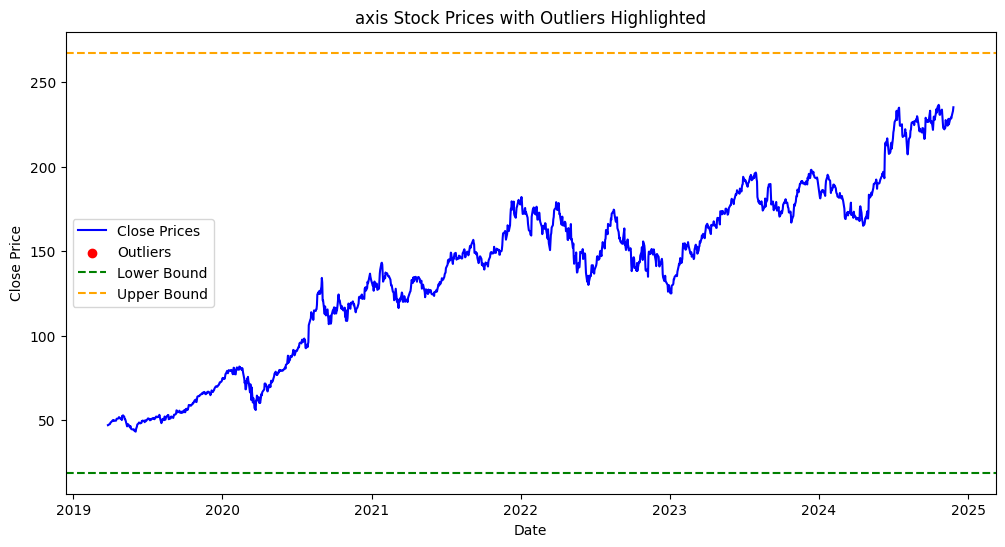



NUMBER OF OUTLIERS IN THE SERIES : 0


Empty DataFrame
Columns: [Date, Close]
Index: []


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate IQR for Close prices
Q1 = df_axis['Close'].quantile(0.25)
Q3 = df_axis['Close'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
df_axis['Outlier'] = (df_axis['Close'] < lower_bound) | (df_axis['Close'] > upper_bound)

# Separate outliers for visualization
outliers = df_axis[df_axis['Outlier']]

# Plotting the data and highlighting outliers
plt.figure(figsize=(12, 6))
plt.plot(df_axis['Date'], df_axis['Close'], label='Close Prices', color='blue')
plt.scatter(outliers['Date'], outliers['Close'], color='red', label='Outliers', zorder=5)
plt.axhline(y=lower_bound, color='green', linestyle='--', label='Lower Bound')
plt.axhline(y=upper_bound, color='orange', linestyle='--', label='Upper Bound')
plt.title("axis Stock Prices with Outliers Highlighted")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()
print('\n')
print(f"NUMBER OF OUTLIERS IN THE SERIES : {outliers.shape[0]}")
print('\n')
print(outliers[['Date', 'Close']])

Original dataset size: 1429


Dataset size after removing outliers: 1429




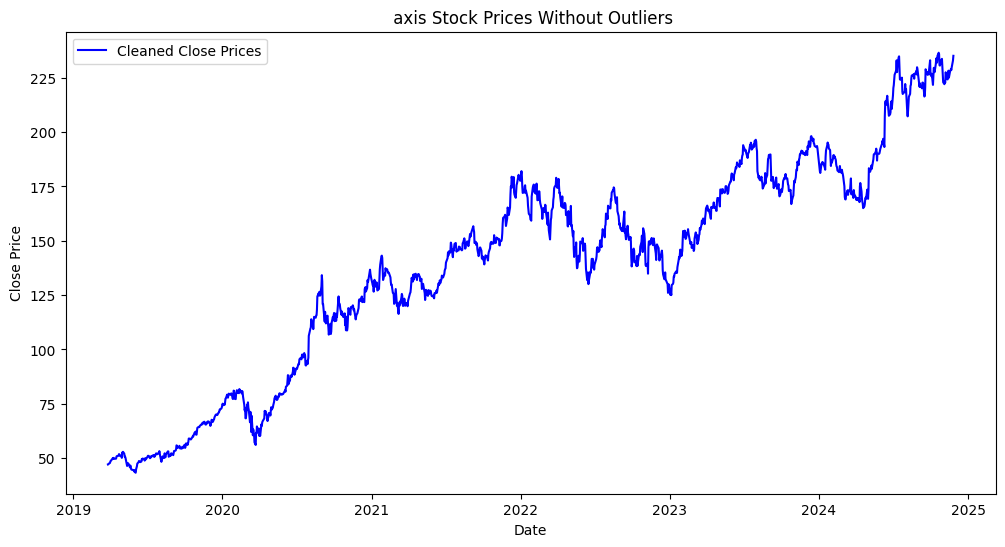

In [ ]:
# Removing outliers based on the IQR boundaries obtained above
axis_1 = df_axis[(df_axis['Close'] >= lower_bound) & (df_axis['Close'] <= upper_bound)]


print(f"Original dataset size: {df_axis.shape[0]}")
print('\n')
print(f"Dataset size after removing outliers: {axis_1.shape[0]}")
print('\n')

plt.figure(figsize=(12, 6))
plt.plot(axis_1['Date'], axis_1['Close'], label='Cleaned Close Prices', color='blue')
plt.title(" axis Stock Prices Without Outliers")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

# **STATIONARITY**

stationarity is an important characteristic of time series. A time series is stationarity if it has constant mean and variance over time. Most models work only with stationary data as this makes it easier to model. Not all time series are stationary but we can transform them into stationary series in different ways.

Often, stock prices are not a stationary process, since we might see a growing trend, or its volatility might increase over time (meaning that variance is changing).

------------------------------

Check for sationarity
Autocorrelation and Partial autocorrelation plots
Autocorelation plots show how correlated are values at time t with the next values in time t+1,t+2,..t+n. If the data would be non-stationary the autocorrelation values will be highly correlated with distant points in time showing possible seasonalities or trends.

Stationary series autocorrelation values will quickly decrease over time t. This shows us that no information is carried over time and then the series should be constant over time.

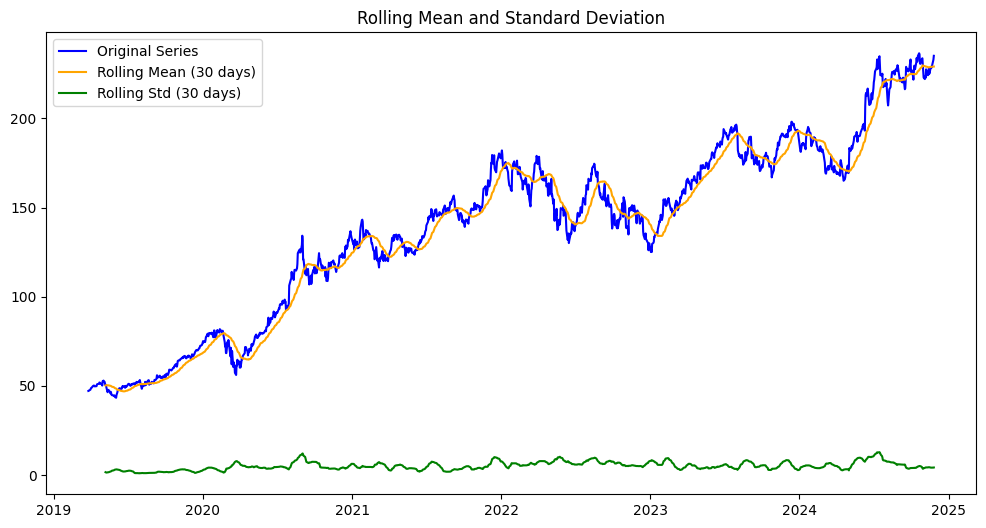

In [ ]:
## Checking Rolling means and standard deviation of our series


# Select the closing price column
ts = data['Close']

# Calculate rolling mean and standard deviation
rolling_mean = ts.rolling(window=30).mean()  # 30-day rolling mean
rolling_std  = ts.rolling(window=30).std()   # 30-day rolling standard deviation

print('\n')
# Plot original series, rolling mean, and rolling std
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Original Series', color='blue')
plt.plot(rolling_mean, label='Rolling Mean (30 days)', color='orange')
plt.plot(rolling_std, label='Rolling Std (30 days)', color='green')
plt.title('Rolling Mean and Standard Deviation')
plt.legend(loc='best')
plt.show()


# **ADF TEST**

It is performed to determine whether a time series is stationary or non-stationary

**Hypothesis Test :**

Null hypothesis : the time series has unit root(non-stationary)

Alternate hypothesis :  the time series does not have unit root(stationary)

after performing ADF test we determine whether to accept null hypothesis or reject null hypothesis

ADF Statistic: -0.8816224024014155
p-value: 0.7939641674669269
Critical Values:
   1%: -3.4349376007389965
   5%: -2.8635661096787812
   10%: -2.567848688436159

The time series is non-stationary (Fail to reject the null hypothesis).




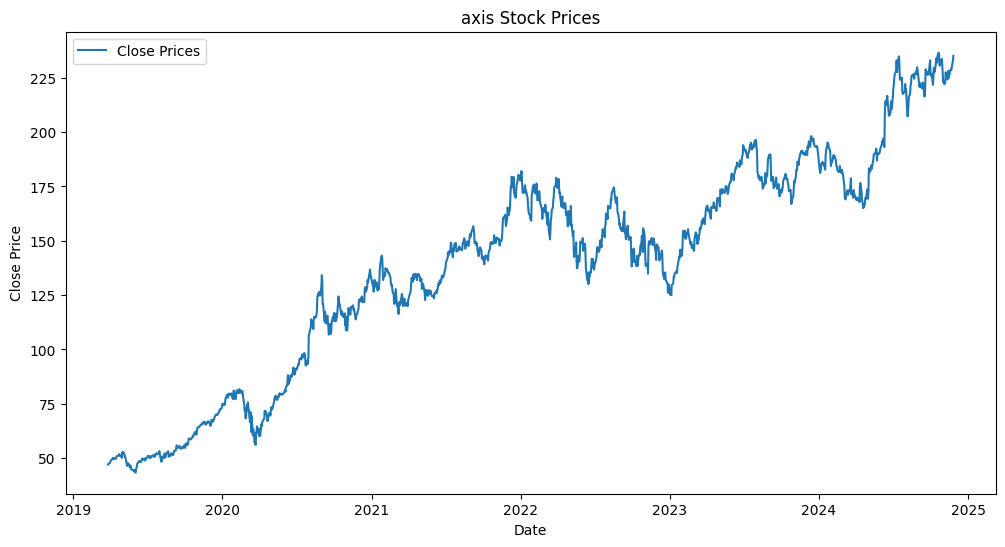

In [ ]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Perform ADF test
result = adfuller(axis_1['Close'])

# Print ADF test results
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

# Interpretation
if result[1] <= 0.05:
    print("\nThe time series is stationary (Reject the null hypothesis).")
else:
    print("\nThe time series is non-stationary (Fail to reject the null hypothesis).")

print('\n')
# Optional: Plot the series to visually inspect stationarity
plt.figure(figsize=(12, 6))
plt.plot(axis_1['Date'], axis_1['Close'], label='Close Prices')
plt.title("axis Stock Prices")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


# **DIFFERENCING**

Technique used to make non-stationary time series data into stationary time series data by removing the trends and seasonality.

In case of Non linear trends differencing is applied more than once to remove trends and achieve stationarity



ADF Statistic (First-order differencing) :  -38.47491622286555


p-value :  0.0

 --> The time series is  STATIONARY after FIRST - ORDER differencing.




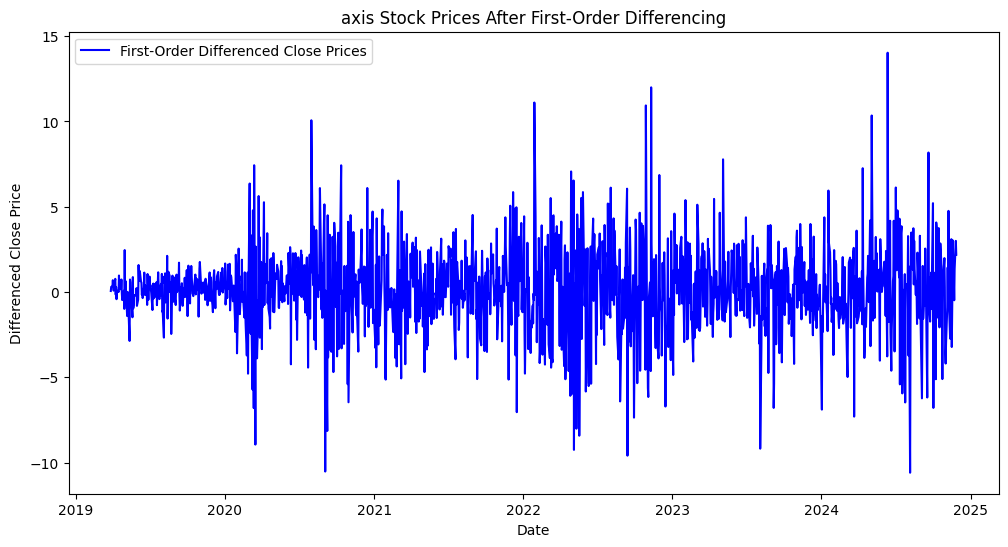

In [ ]:

from statsmodels.tsa.stattools import adfuller

# First-order differencing
axis_1['Close_diff'] = axis_1['Close'].diff().dropna()

# ADF test after first-order differencing
result_diff1 = adfuller(axis_1['Close_diff'].dropna())
print('\n')
print("ADF Statistic (First-order differencing) : ", result_diff1[0])
print('\n')
print("p-value : ", result_diff1[1])
if result_diff1[1] <= 0.05:
    print("\n --> The time series is  STATIONARY after FIRST - ORDER differencing.")
else:
    print("\n --> The time series is still non-stationary. Consider higher-order differencing.")
    print('\n')

# Optional: Second-order differencing (if necessary)
if result_diff1[1] > 0.05:
    axis_1['Close_diff2'] = axis_1['Close_diff'].diff().dropna()
    result_diff2 = adfuller(axis_1['Close_diff2'].dropna())
    print("\nADF Statistic (Second-order differencing) : ", result_diff2[0])
    print("p-value : ", result_diff2[1])
    if result_diff2[1] <= 0.05:
        print("\n --> The time series is stationary after second-order differencing.")
    else:
        print("\n --> The time series is still non-stationary. Consider further transformations.")

print('\n')
# Plot the first-differenced series
plt.figure(figsize=(12, 6))
plt.plot(axis_1['Date'], axis_1['Close_diff'], label='First-Order Differenced Close Prices', color='blue')
plt.title("axis Stock Prices After First-Order Differencing")
plt.xlabel("Date")
plt.ylabel("Differenced Close Price")
plt.legend()
plt.show()

# Plot second-order differencing if applied
if 'Close_diff2' in axis_1.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(axis_1['Date'], axis_1['Close_diff2'], label='Second-Order Differenced Close Prices', color='green')
    plt.title("axis Stock Prices After Second-Order Differencing")
    plt.xlabel("Date")
    plt.ylabel("Differenced Close Price")
    plt.legend()
    plt.show()

In [ ]:
axis_1

,Date,Close,Outlier,Close_diff
2,2017-03-27,41.9255,False,NaN
3,2017-03-28,42.0315,False,0.1060
4,2017-03-29,42.4935,False,0.4620
5,2017-03-30,42.4740,False,-0.0195
6,2017-03-31,42.3900,False,-0.0840
...,...,...,...,...
1929,2024-11-20,175.9800,False,-2.1400
1930,2024-11-21,167.6300,False,-8.3500
1931,2024-11-22,164.7600,False,-2.8700
1932,2024-11-25,167.6500,False,2.8900


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error


# step 1: splitting the dataset into train and test sets
train_size  =  int(len(axis_1) * 0.8)
axis_train = axis_1.iloc[:train_size].copy()
axis_test  = axis_1.iloc[train_size:].copy()

In [ ]:
len(axis_train)

1143

In [ ]:
axis_train.isnull().sum()

axis_train1 = axis_train.dropna()

In [ ]:
axis_train1.isnull().sum()

,0
Date,0
Close,0
Outlier,0
Close_diff,0


In [ ]:
axis_train1.head(6)

,Date,Close,Outlier,Close_diff
3,2019-03-28,47.1800,False,0.0625
4,2019-03-29,47.4875,False,0.3075
5,2019-04-01,47.8100,False,0.3225
6,2019-04-02,48.5050,False,0.6950
7,2019-04-03,48.8375,False,0.3325
8,2019-04-04,48.9225,False,0.0850


In [ ]:
axis_train = axis_train1[['Date', 'Close_diff']].copy()

In [ ]:
axis_train.head(5)

,Date,Close_diff
3,2019-03-28,0.0625
4,2019-03-29,0.3075
5,2019-04-01,0.3225
6,2019-04-02,0.6950
7,2019-04-03,0.3325


Suggested p (AR order): 8
Suggested q (MA order): 8




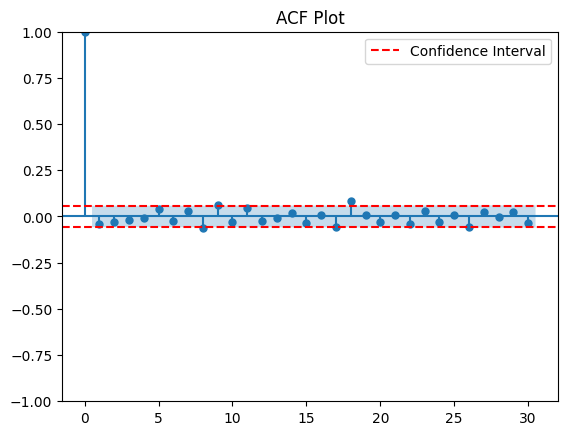

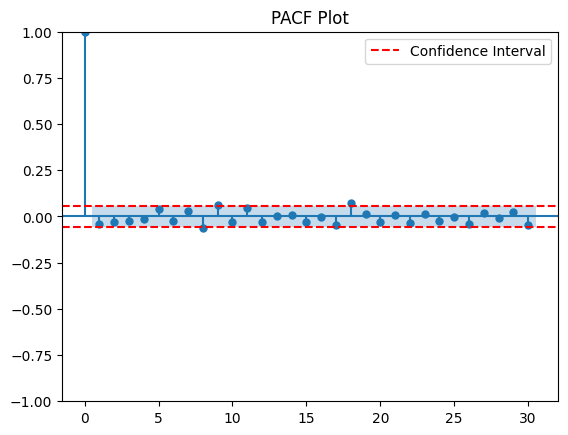

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

# Ensure you pass only the numeric differenced series
differenced_series = axis_train['Close_diff']

# Calculate ACF and PACF
acf_values  = acf(differenced_series, nlags=30)
pacf_values = pacf(differenced_series, nlags=30, method='ywm')

# Find significant lags
acf_threshold = 1.96 / np.sqrt(len(differenced_series))  # Confidence interval
pacf_threshold = acf_threshold

# Identify p (AR order) from PACF
p = np.where(np.abs(pacf_values) > pacf_threshold)[0]
p = p[1] if len(p) > 1 else 0  # Ignore lag 0

# Identify q (MA order) from ACF
q = np.where(np.abs(acf_values) > acf_threshold)[0]
q = q[1] if len(q) > 1 else 0  # Ignore lag 0

# Print results
print(f"Suggested p (AR order): {p}")
print(f"Suggested q (MA order): {q}")

print('\n')
# Plot ACF
plot_acf(differenced_series, lags=30)
plt.axhline(y=acf_threshold, linestyle='--', color='red', label='Confidence Interval')
plt.axhline(y=-acf_threshold, linestyle='--', color='red')
plt.title("ACF Plot")
plt.legend()
plt.show()

print('\n')
# Plot PACF
plot_pacf(differenced_series, lags=30, method='ywm')
plt.axhline(y=pacf_threshold, linestyle='--', color='red', label='Confidence Interval')
plt.axhline(y=-pacf_threshold, linestyle='--', color='red')
plt.title("PACF Plot")
plt.legend()
plt.show()


# **Autoregressive integrated moving average (ARIMA)**

In an ARIMA model there are 3 parameters that are used to help model the major aspects of a times series: seasonality, trend, and noise. These parameters are labeled p,d,and q.

Number of AR (Auto-Regressive) terms (p): p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
Number of Differences (d): d is the parameter associated with the integrated part of the model, which effects the amount of differencing to apply to a time series.
Number of MA (Moving Average) terms (q): q is size of the moving average part window of the model i.e. lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
Tuning ARIMA parameters

Non stationarity series will require level of differencing (d) >0 in ARIMA Select the lag values for the Autoregression (AR) and Moving Average (MA) parameters, p and q respectively, using PACF, ACF plots AUTOARIMA

Note: A problem with ARIMA is that it does not support seasonal data. That is a time series with a repeating cycle. ARIMA expects data that is either not seasonal or has the seasonal component removed, e.g. seasonally adjusted via methods such as seasonal differencing.

In [ ]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.2 MB/s eta 0:00:00


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5307.781, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5307.830, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5307.706, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5308.269, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5308.481, Time=0.71 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5308.670, Time=0.31 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5310.356, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5308.423, Time=0.08 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.887 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1142
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2650.853
Date:                Fri, 29 Nov 2024   AIC                           5307.706
Time:                        18:05:3

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


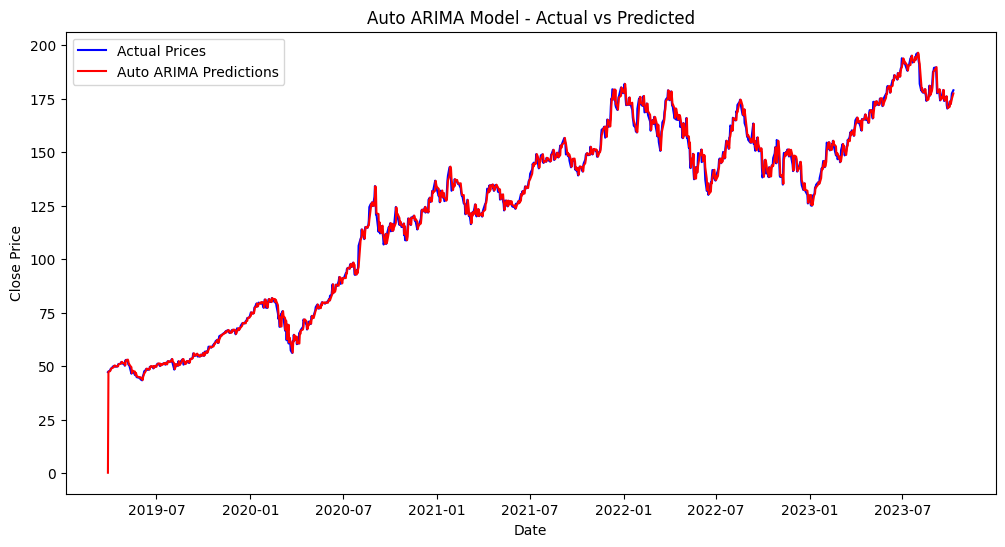

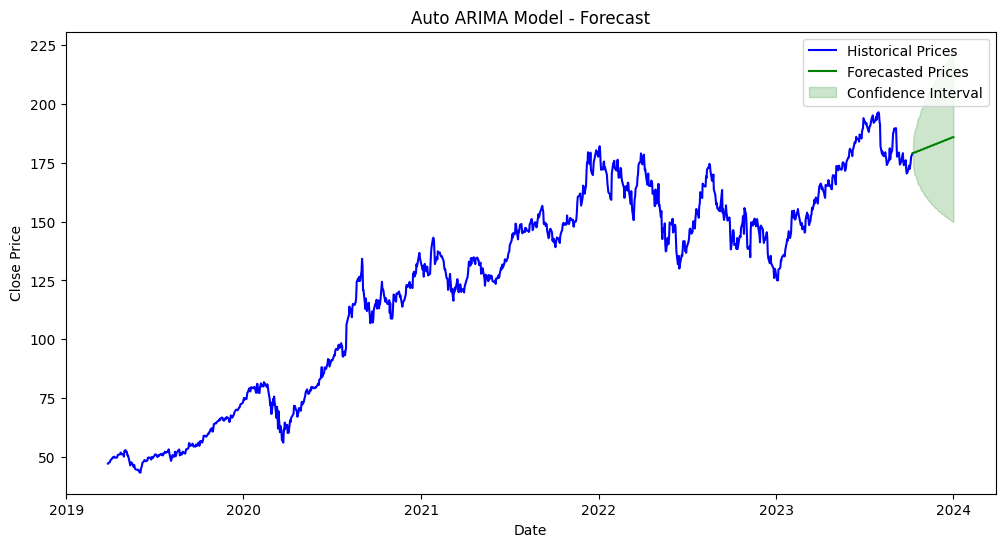

In [ ]:
import pmdarima as pm
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Fit Auto ARIMA model
auto_arima_model = pm.auto_arima(
    axis_train1['Close'],
    start_p=0, max_p=5,  # Range for p
    start_q=0, max_q=5,  # Range for q
    d=None,  # Let the model determine differencing order
    seasonal=False,  # Non-seasonal model
    stepwise=True,  # Stepwise model selection
    trace=True,  # Print the process
    error_action='ignore',  # Ignore errors to keep running
    suppress_warnings=True,  # Suppress warnings
    max_order=None,  # No restriction on p+q
    random_state=42
)

# Summary of the best selected model
print(auto_arima_model.summary())

# Forecast the next 60 days (or desired steps)
forecast_steps = 60
forecast, conf_int = auto_arima_model.predict(n_periods=forecast_steps, return_conf_int=True)

# Evaluate model on training data
train_predictions = auto_arima_model.predict_in_sample()

mae = mean_absolute_error(axis_train1['Close'], train_predictions)
rmse = np.sqrt(mean_squared_error(axis_train1['Close'], train_predictions))

print("\n")
print(f"Model MAE: {mae}")
print("\n")
print(f"Model RMSE: {rmse}")
print("\n")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(axis_train['Date'], axis_train1['Close'], label='Actual Prices', color='blue')
plt.plot(axis_train['Date'], train_predictions, label='Auto ARIMA Predictions', color='red')
plt.title("Auto ARIMA Model - Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()
print("\n")

# Forecast visualization
future_dates = pd.date_range(start=axis_train['Date'].iloc[-1], periods=forecast_steps + 1, freq='B')[1:]
plt.figure(figsize=(12, 6))
plt.plot(axis_train['Date'], axis_train1['Close'], label='Historical Prices', color='blue')
plt.plot(future_dates, forecast, label='Forecasted Prices', color='green')

# Add confidence intervals to the plot
plt.fill_between(future_dates, conf_int[:, 0], conf_int[:, 1], color='green', alpha=0.2, label='Confidence Interval')

plt.title("Auto ARIMA Model - Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv



Model MAE: 0.31544486528997173


Model RMSE: 0.4163161913975865




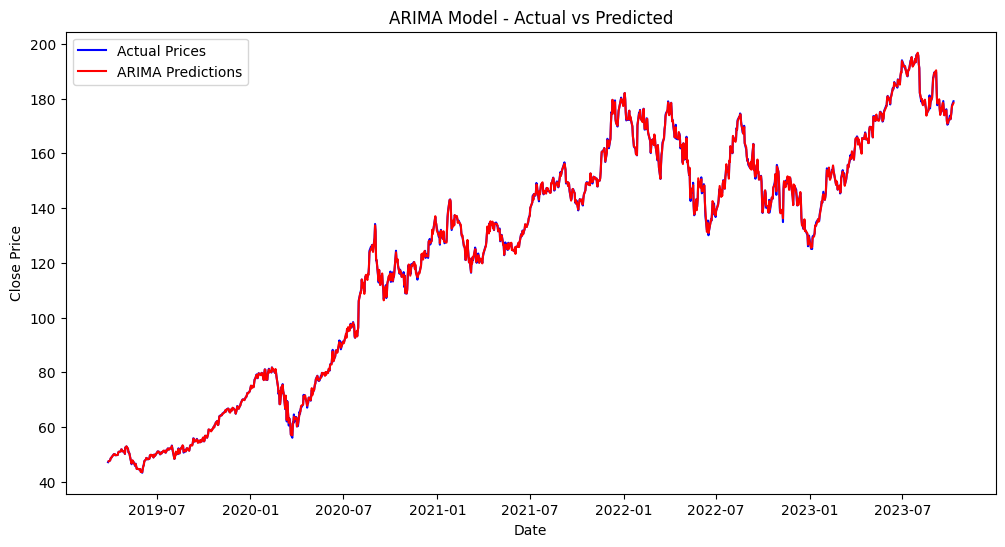

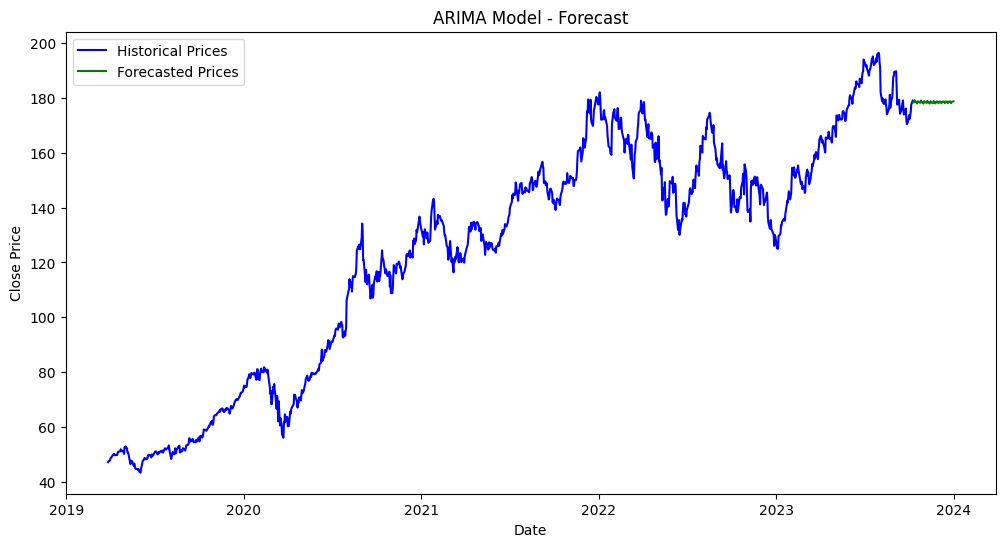

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

#ARIMA model
p, d, q = 8, 1, 8  # Values based on ACF and PACF
arima_model = ARIMA(axis_train1['Close'], order=(p, d, q))

# model fitting
arima_result = arima_model.fit()


# Forecast the next 30 days (or desired steps)
forecast_steps = 60
forecast = arima_result.forecast(steps=forecast_steps)


# Evaluate model on training data
train_predictions = arima_result.predict(start=1, end=len(axis_train1['Close']), typ='levels')

mae = mean_absolute_error(axis_train1['Close'].iloc[1:], train_predictions.iloc[1:])

rmse = np.sqrt(mean_squared_error(axis_train1['Close'].iloc[1:], train_predictions.iloc[1:]))


print('\n')
print(f"Model MAE: {mae}")
print('\n')
print(f"Model RMSE: {rmse}")
print('\n')
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(axis_train['Date'], axis_train1['Close'], label='Actual Prices', color='blue')
plt.plot(axis_train['Date'].iloc[1:], train_predictions.iloc[1:], label='ARIMA Predictions', color='red')
plt.title("ARIMA Model - Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()
print('\n')
# Forecast visualization
future_dates = pd.date_range(start=axis_train['Date'].iloc[-1], periods=forecast_steps + 1, freq='B')[1:]
plt.figure(figsize=(12, 6))
plt.plot(axis_train['Date'], axis_train1['Close'], label='Historical Prices', color='blue')
plt.plot(future_dates, forecast, label='Forecasted Prices', color='green')
plt.title("ARIMA Model - Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

In [ ]:
# model Summary
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1514
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -6625.173
Date:                Fri, 29 Nov 2024   AIC                          13256.346
Time:                        17:38:44   BIC                          13272.314
Sample:                             0   HQIC                         13262.292
                               - 1514                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1225.9079    181.257      6.763      0.000     870.650    1581.166
ar.L1          0.9983      0.002    639.535      0.000       0.995       1.001
sigma2       368.7850      6.402     57.602      0.0

In [ ]:
## train_predictions = arima_result.predict(start=1, end=len(hdfc_train1['Close']), typ='levels')

train_predictions

,predicted_mean
1,710.111770
2,714.469686
3,733.697247
4,719.308415
5,717.012897
...,...
1507,1695.456034
1508,1728.963594
1509,1615.880103
1510,1651.083251


In [ ]:
forecast

,predicted_mean
1511,1647.311533
1512,1644.822337
1513,1640.682254
1514,1649.159474
1515,1646.604757
1516,1643.002594
1517,1645.854184
1518,1649.854218
1519,1644.156774
1520,1644.976647


ARIMA Model Errors:


MAE: 9.606252157537044


RMSE: 11.184356866403624




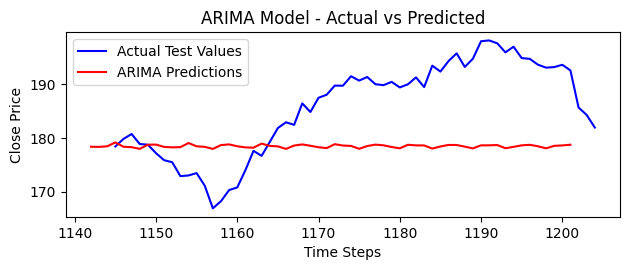

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


test_values = axis_test['Close'].iloc[:60]

arima_mae = mean_absolute_error(test_values, forecast)

arima_rmse = np.sqrt(mean_squared_error(test_values, forecast))

print("ARIMA Model Errors:")
print('\n')
print(f"MAE: {arima_mae}")
print('\n')
print(f"RMSE: {arima_rmse}")
print('\n')
# Forecast visualization
# Plot ARIMA predictions
plt.subplot(2, 1, 1)
plt.plot(test_values, label="Actual Test Values", color='blue')
plt.plot(forecast, label="ARIMA Predictions", color='red')
plt.title("ARIMA Model - Actual vs Predicted")
plt.xlabel("Time Steps")
plt.ylabel("Close Price")
plt.legend()
plt.tight_layout()
plt.show()

Auto ARIMA Model Errors:


MAE: 9.606252157537044


RMSE: 11.184356866403624




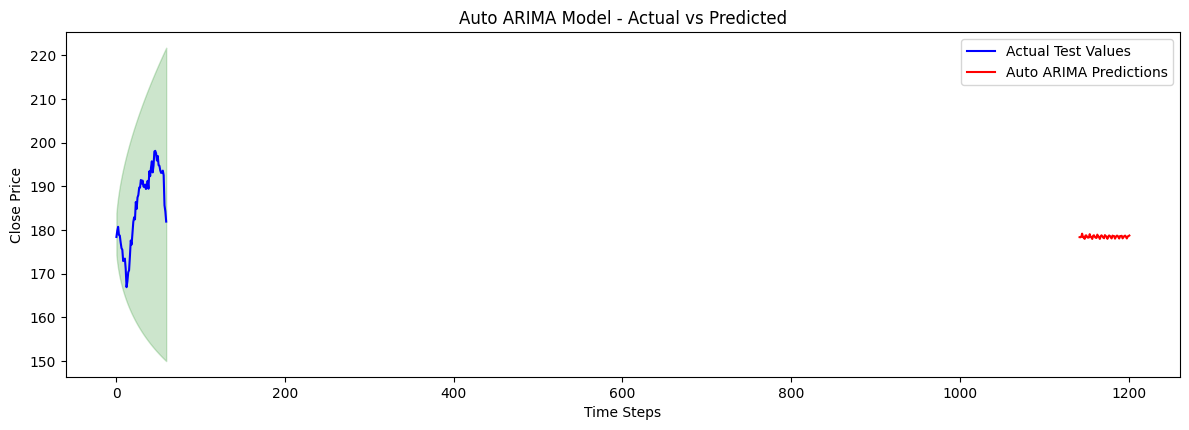

In [ ]:
## AUTO ARIMA

from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'forecast' contains Auto ARIMA predictions and 'axis_test' contains the test data
test_values = axis_test['Close'].iloc[:60]  # First 60 actual test values (adjust as needed)

# Calculate errors
auto_arima_mae = mean_absolute_error(test_values, forecast)
auto_arima_rmse = np.sqrt(mean_squared_error(test_values, forecast))

# Print errors
print("Auto ARIMA Model Errors:")
print("\n")
print(f"MAE: {auto_arima_mae}")
print("\n")
print(f"RMSE: {auto_arima_rmse}")
print("\n")

# Visualization
plt.figure(figsize=(12, 8))

# Plot Auto ARIMA predictions vs Actual test values
plt.subplot(2, 1, 1)
plt.plot(test_values.values, label="Actual Test Values", color='blue')
plt.plot(forecast, label="Auto ARIMA Predictions", color='red')
plt.title("Auto ARIMA Model - Actual vs Predicted")
plt.xlabel("Time Steps")
plt.ylabel("Close Price")
plt.legend()

# Confidence intervals visualization (optional, if available from Auto ARIMA)
if 'conf_int' in locals():  # Ensure confidence intervals exist
    lower_bounds = conf_int[:, 0]
    upper_bounds = conf_int[:, 1]
    plt.fill_between(range(len(forecast)), lower_bounds, upper_bounds, color='green', alpha=0.2, label="Confidence Interval")

plt.tight_layout()
plt.show()


# **LSTM**

In [ ]:
from tensorflow.keras.layers import LSTM

In [ ]:
### Creating the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout ,BatchNormalization
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.initializers import RandomNormal, Constant


In [ ]:
# Normalize the data

scaler = MinMaxScaler()

axis_train1['Close_scaled'] = scaler.fit_transform(axis_train1['Close'].values.reshape(-1, 1))

In [ ]:
# Prepare the data for LSTM (sliding window)


def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

In [ ]:
sequence_length = 60  # Lookback period (e.g., 60 days)
data = axis_train1['Close_scaled'].values
X, y = create_sequences(data, sequence_length)

In [ ]:
# Splitting  into training and testing sets

train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [ ]:
## LSTM Stack model

model1 = Sequential()

model1.add(LSTM(150,return_sequences=True,input_shape=(sequence_length,1)))  # first LSTM layer
model1.add(Dropout(0.2))                                         # Dropout regularisation
model1.add(LSTM(150,return_sequences=True))                      # second LSTM layer
model1.add(LSTM(150, return_sequences=True))                     # third LSTM layer
model1.add(Dropout(0.2))
model1.add(LSTM(150))                                            # fourth LSTM layer
model1.add(Dropout(0.2))
model1.add(Dense(1))                                             # Output Layer

model1.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
## LSTM Stack model

model2 = Sequential()

model2.add(LSTM(100, return_sequences=True, input_shape=(sequence_length, 1)))  # First LSTM layer
model2.add(Dropout(0.2))
model2.add(LSTM(100, return_sequences=True))  # Second LSTM layer
model2.add(Dropout(0.2))
model2.add(LSTM(100, return_sequences=False))  # Third LSTM layer
model2.add(Dropout(0.2))
model2.add(Dense(1))  # Output Layer

model2.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
model3 = Sequential()

model3.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))  # First LSTM layer
model3.add(Dropout(0.2))
model3.add(LSTM(50, return_sequences=False))  # Second LSTM layer
model3.add(Dropout(0.2))
model3.add(Dense(1))  # Output Layer

model3.compile(loss='mean_squared_error', optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 150)             │          91,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 150)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 150)             │         180,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 60, 150)             │         180,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 150)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 150)                 │         180,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             151 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 633,153 (2.42 MB)

 Trainable params: 633,153 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_19 (LSTM)                       │ (None, 60, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_20 (LSTM)                       │ (None, 60, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_21 (LSTM)                       │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,701 (787.89 KB)

 Trainable params: 201,701 (787.89 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#history= model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=54,batch_size=64,verbose=1)


In [ ]:
# Train the model 1

history = model1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 25s 500ms/step - loss: 0.0531 - val_loss: 0.0183
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 22s 561ms/step - loss: 0.0058 - val_loss: 0.0036
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 509ms/step - loss: 0.0034 - val_loss: 0.0042
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 457ms/step - loss: 0.0039 - val_loss: 0.0048
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 20s 443ms/step - loss: 0.0041 - val_loss: 0.0054
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 454ms/step - loss: 0.0041 - val_loss: 0.0029
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 455ms/step - loss: 0.0032 - val_loss: 0.0027
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 22s 488ms/step - loss: 0.0030 - val_loss: 0.0025
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 452ms/step - loss: 0.0027 - val_loss: 0.0030
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 460ms/step - loss: 0.0022 - val_loss: 0.0026


In [ ]:
# Train the model 2

history2 = model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - loss: 0.0704 - val_loss: 0.0033
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - loss: 0.0041 - val_loss: 0.0032
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - loss: 0.0038 - val_loss: 0.0027
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - loss: 0.0036 - val_loss: 0.0032
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 181ms/step - loss: 0.0031 - val_loss: 0.0038
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - loss: 0.0036 - val_loss: 0.0027
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - loss: 0.0034 - val_loss: 0.0045
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - loss: 0.0033 - val_loss: 0.0048
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 181ms/step - loss: 0.0028 - val_loss: 0.0022


In [ ]:
## TRAINING MODEL 3

history3 = model3.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 0.0795 - val_loss: 0.0027
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0087 - val_loss: 0.0023
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0042 - val_loss: 0.0051
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0074 - val_loss: 0.0014
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0048 - val_loss: 0.0016
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0040 - val_loss: 0.0020
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 0.0039 - val_loss: 0.0023
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0038 - val_loss: 0.0026
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0035 - val_loss: 0.0016
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0032 - val_loss: 0.0012


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
LSTM Model MAE: 4.494433329358078


LSTM Model RMSE: 5.349614327269607




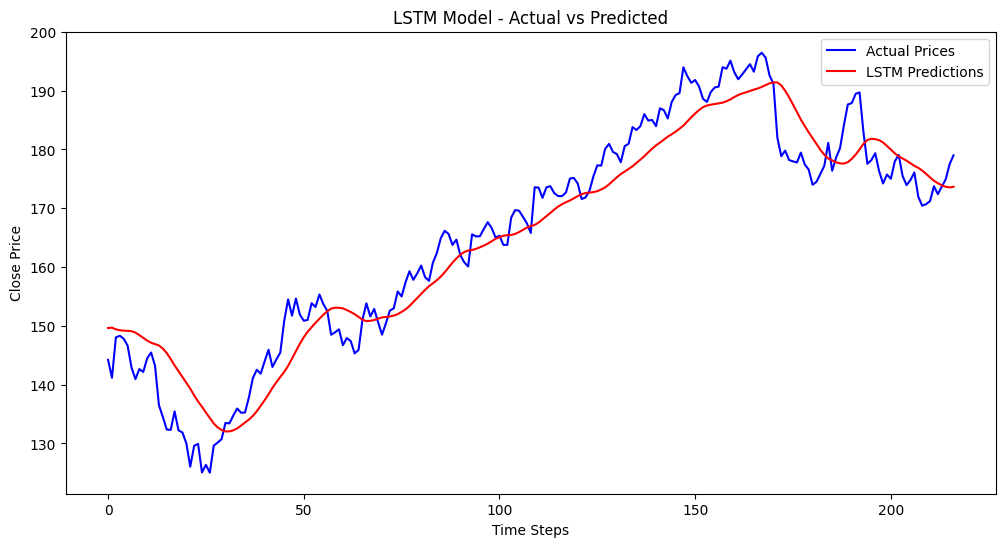

In [ ]:
# Evaluate the model on the test set

predictions = model3.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Metrics
mae = mean_absolute_error(y_test_actual, predictions)
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))

print(f"LSTM Model MAE: {mae}")
print('\n')
print(f"LSTM Model RMSE: {rmse}")
print('\n')
# Plot actual vs predicted for the test set
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_actual)), y_test_actual, label="Actual Prices", color='blue')
plt.plot(range(len(predictions)), predictions, label="LSTM Predictions", color='red')
plt.title("LSTM Model - Actual vs Predicted")
plt.xlabel("Time Steps")
plt.ylabel("Close Price")
plt.legend()
plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step
LSTM Model MAE: 35.23117356972187


LSTM Model RMSE: 47.686446163438816




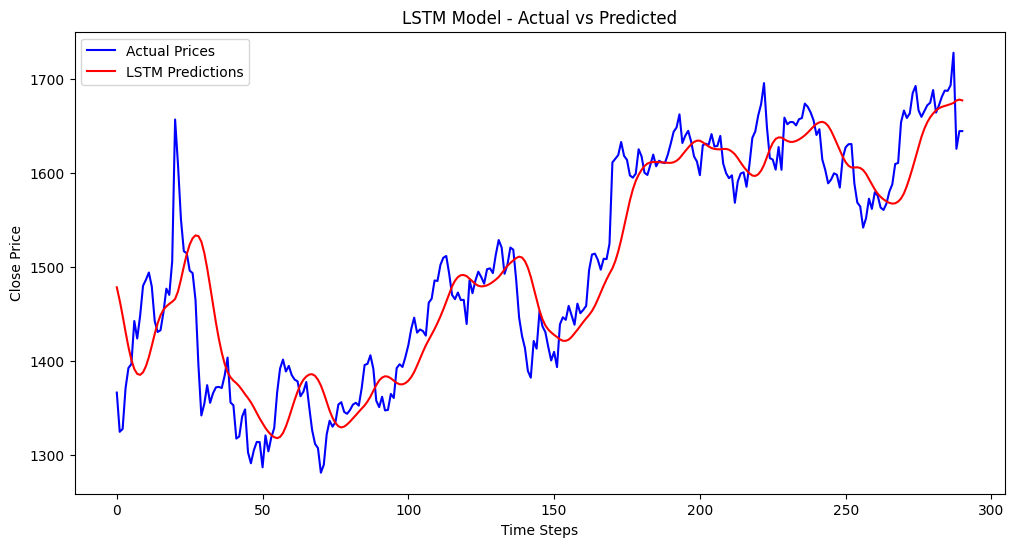

In [ ]:
# Evaluate the model on the test set

predictions = model2.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Metrics
mae = mean_absolute_error(y_test_actual, predictions)
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))

print(f"LSTM Model MAE: {mae}")
print('\n')
print(f"LSTM Model RMSE: {rmse}")
print('\n')
# Plot actual vs predicted for the test set
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_actual)), y_test_actual, label="Actual Prices", color='blue')
plt.plot(range(len(predictions)), predictions, label="LSTM Predictions", color='red')
plt.title("LSTM Model - Actual vs Predicted")
plt.xlabel("Time Steps")
plt.ylabel("Close Price")
plt.legend()
plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
LSTM Model MAE: 35.76628845844073


LSTM Model RMSE: 46.329192718668594




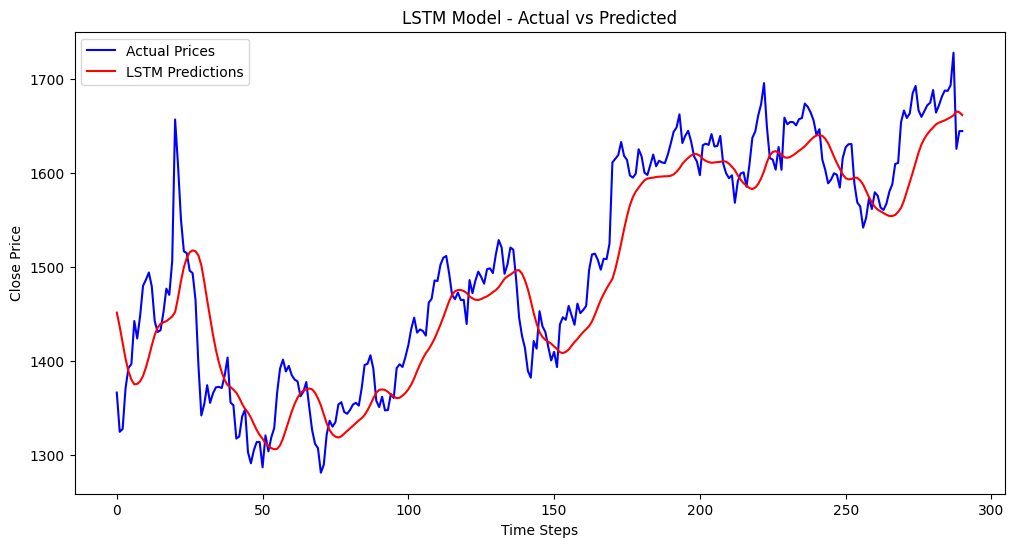

In [ ]:
# Evaluate the model on the test set

predictions = model3.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Metrics
mae = mean_absolute_error(y_test_actual, predictions)
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))

print(f"LSTM Model MAE: {mae}")
print('\n')
print(f"LSTM Model RMSE: {rmse}")
print('\n')
# Plot actual vs predicted for the test set
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_actual)), y_test_actual, label="Actual Prices", color='blue')
plt.plot(range(len(predictions)), predictions, label="LSTM Predictions", color='red')
plt.title("LSTM Model - Actual vs Predicted")
plt.xlabel("Time Steps")
plt.ylabel("Close Price")
plt.legend()
plt.show()


In [ ]:
future_steps = 60  # Number of steps to forecast
last_sequence = data[-sequence_length:]

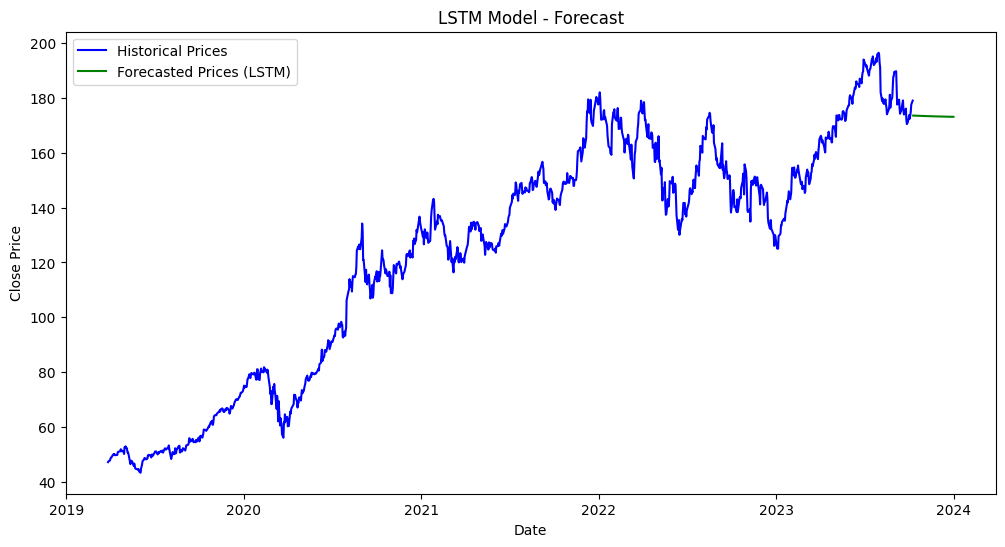

In [ ]:
# Last available sequence
forecast = []

for _ in range(future_steps):
    # Ensure input_seq has the correct shape and data type
    input_seq = last_sequence.reshape(1, sequence_length, 1).astype(np.float32)
    next_value = model3.call(input_seq, training=False)  # Predict next value
    forecast.append(next_value[0, 0])  # Save the forecasted value
    last_sequence = np.append(last_sequence[1:], next_value[0, 0])  # Slide window

# Inverse transform the forecasted values to the original scale
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Plot the forecast
future_dates = pd.date_range(start= axis_train1['Date'].iloc[-1], periods=future_steps + 1, freq='B')[1:]
plt.figure(figsize=(12, 6))
plt.plot(axis_train1['Date'], axis_train1['Close'], label="Historical Prices", color='blue')
plt.plot(future_dates, forecast, label="Forecasted Prices (LSTM)", color='green')
plt.title("LSTM Model - Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


In [ ]:
# Convert the 2D forecast array to a 1D array
forecast_1d = forecast.flatten()

forecast_1d

array([173.54224, 173.53127, 173.52048, 173.50981, 173.49924, 173.48889,
       173.47862, 173.46849, 173.45847, 173.44858, 173.43884, 173.42917,
       173.41966, 173.41028, 173.401  , 173.39183, 173.38275, 173.37381,
       173.365  , 173.35626, 173.34766, 173.33916, 173.33078, 173.32248,
       173.3143 , 173.30618, 173.29823, 173.29033, 173.28252, 173.27484,
       173.26727, 173.25977, 173.25237, 173.24504, 173.23781, 173.2307 ,
       173.22365, 173.21669, 173.2098 , 173.20303, 173.19632, 173.1897 ,
       173.18318, 173.17673, 173.17032, 173.16406, 173.15784, 173.15169,
       173.14565, 173.13966, 173.13373, 173.12788, 173.12212, 173.11641,
       173.1108 , 173.10524, 173.09976, 173.09438, 173.08897, 173.08371],
      dtype=float32)

In [ ]:
forecast_df = pd.DataFrame({'values': forecast_1d})
forecast_df.index = range(1542, 1542 + len(forecast))
forecast_df

,values
1542,173.542236
1543,173.531265
1544,173.520477
1545,173.509811
1546,173.499237
1547,173.488892
1548,173.478622
1549,173.468491
1550,173.458466
1551,173.448578


In [ ]:
test_values= axis_test['Close'].iloc[:60]


LSTM Model Errors:
MAE: 12.957375946044921


RMSE: 15.057530440711117




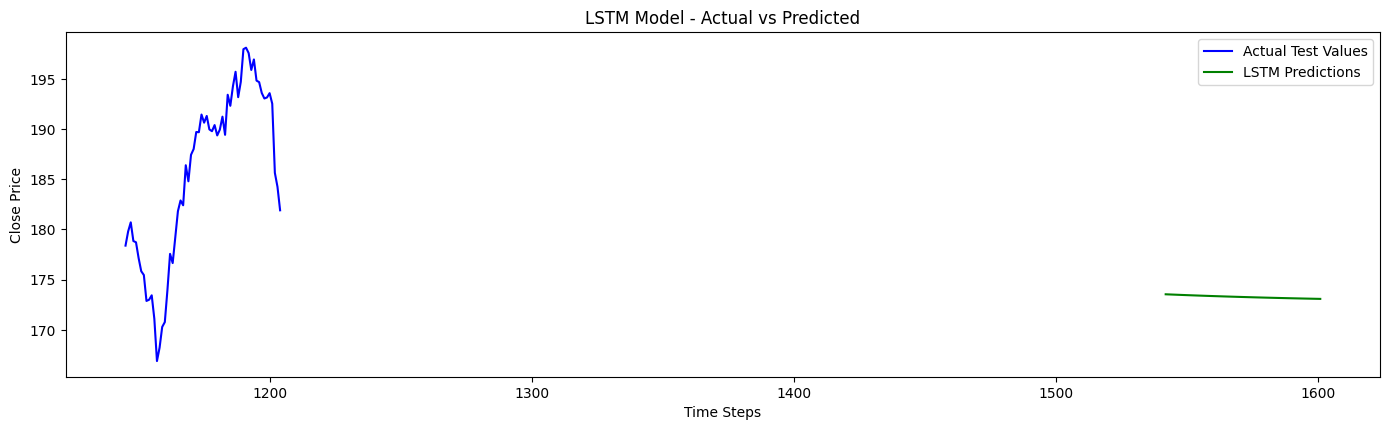

In [ ]:
test_values= axis_test['Close'].iloc[:60]

lstm_mae = mean_absolute_error(test_values, forecast_df)
lstm_rmse = np.sqrt(mean_squared_error(test_values, forecast_df))

print("\nLSTM Model Errors:")
print(f"MAE: {lstm_mae}")
print('\n')
print(f"RMSE: {lstm_rmse}")
print('\n')
# Forecast visualization
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 2)
plt.plot(test_values, label="Actual Test Values", color='blue')
plt.plot(forecast_df, label="LSTM Predictions", color='green')
plt.title("LSTM Model - Actual vs Predicted")
plt.xlabel("Time Steps")
plt.ylabel("Close Price")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
monitor = EarlyStopping ( monitor = 'val_loss', min_delta=1e-3, patience=30, verbose=1, mode='auto', restore_best_weights=True)



In [ ]:
history=model.fit( X_train, y_train, validation_data = (X_test,ytest), callbacks=[monitor], verbose=1,epochs=1000)

In [ ]:
## API KEY -- nixak-pL3fvLKVWHKBz9o61QAjiw5lHFnZdn7vpEkvOL7HjYUFkJJ4H6WPJDu4szCOnLsU1elc8vp6CmHr5UaP

In [ ]:

!pip install nixtla>=0.5.1
!pip install yfinance

In [ ]:
import os
os.environ["TIMEGPT_API_KEY"] = "nixak-pL3fvLKVWHKBz9o61QAjiw5lHFnZdn7vpEkvOL7HjYUFkJJ4H6WPJDu4szCOnLsU1elc8vp6CmHr5UaP "

timegpt_api_key = os.environ["TIMEGPT_API_KEY"]


In [ ]:
from nixtla import NixtlaClient

# Setup NixtlaClient
nixtla_client = NixtlaClient (api_key = timegpt_api_key)

In [ ]:
import pandas as pd
import yfinance as yf

# Downloading Meta stock price data
ticker = 'HDFCBANK.NS'
hdfc_stock_data = yf.download(ticker)
hdfc_stock_data = hdfc_stock_data.reset_index()
hdfc_stock_data = hdfc_stock_data.tail(1500)

# Displaying the dataset
hdfc_stock_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS
5763,2018-11-01 00:00:00+00:00,910.140503,956.099976,965.000000,948.000000,965.000000,9814526
5764,2018-11-02 00:00:00+00:00,927.870239,974.724976,980.000000,956.000000,963.000000,15046434
5765,2018-11-05 00:00:00+00:00,930.987732,978.000000,979.825012,969.000000,974.950012,2852648
5766,2018-11-06 00:00:00+00:00,926.489990,973.275024,988.000000,971.474976,977.500000,4242794
5767,2018-11-07 00:00:00+00:00,931.915955,978.974976,982.474976,975.000000,980.500000,479380


In [ ]:
hdfc_stock_data.tail()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS
7258,2024-11-25 00:00:00+00:00,1785.599976,1785.599976,1803.550049,1764.900024,1785.050049,213868637
7259,2024-11-26 00:00:00+00:00,1785.550049,1785.550049,1810.000000,1769.800049,1810.000000,15467783
7260,2024-11-27 00:00:00+00:00,1812.300049,1812.300049,1817.349976,1785.150024,1789.900024,16357488
7261,2024-11-28 00:00:00+00:00,1793.150024,1793.150024,1836.099976,1788.000000,1819.000000,17861196
7262,2024-11-29 00:00:00+00:00,1796.050049,1796.050049,1804.599976,1782.900024,1801.300049,13834768


In [ ]:
hdfc_stock_forecast = nixtla_client.forecast(
    df= hdfc_stock_data,
    model = "timegpt-1",
    h=12,
    freq="B",
    time_col="Date",
    target_col="Adj Close",
)
hdfc_stock_forecast.tail()

ValueError: The following columns are missing: ['Adj Close', 'Date', 'unique_id']